In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

digits = datasets.load_digits()
df = pd.DataFrame(digits.data)
df['target'] = digits.target
# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Split the DataFrame into training and test sets
train_size = int(0.8 * len(df))  # 80% of the data for training
df_train = df[:train_size]
df_test = df[train_size:]
X_train = df_train.drop('target', axis=1).values
y_train = df_train['target'].values
X_test = df_test.drop('target', axis=1).values
y_test = df_test['target'].values
print(X_train.shape,y_train.shape)###prints out (1437, 64) (1437,)

(1437, 64) (1437,)


In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np

digits = datasets.load_digits()
df = pd.DataFrame(digits.data)
df['target'] = digits.target
# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Split the DataFrame into training and test sets
train_size = int(0.8 * len(df))  # 80% of the data for training
df_train = df[:train_size]
df_test = df[train_size:]
X_train = df_train.drop('target', axis=1).values
y_train = df_train['target'].values
X_test = df_test.drop('target', axis=1).values
y_test = df_test['target'].values
print(X_train.shape,y_train.shape)###prints out (1437, 64) (1437,)
np.random.seed(42)
def init_params():
    W1 = np.random.randn(10, X_train.shape[1]) * np.sqrt(2. / X_train.shape[1])
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * np.sqrt(2. / 10)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2
def relu(z):
    return np.maximum(0,z)
def softmax(z):
    e_z = np.exp(z - np.max(z, axis=0))
    return e_z / np.sum(e_z, axis=0, keepdims=True)
def forward_propogation(X,W1,b1,W2,b2):
    X=X.T
    z1=np.dot(W1,X)+b1
    A1=relu(z1)
    z2=np.dot(W2,A1)+b2
    A2=softmax(z2)
    return z1,A1,z2,A2
def one_hot(Y):
    one_hot_y=np.zeros((Y.size,Y.max()+1))
    one_hot_y[np.arange(Y.size),Y]=1
    return one_hot_y.T
def deriv_relu(z):
    return (z>0).astype(float)
def backward_propogation(z1,A1,z2,A2,W2,X,Y):
    m=Y.size
    one_hot_y=one_hot(Y)
    
    dZ2=A2-one_hot_y
    dW2=np.dot(dZ2,A1.T) * 1/m
    db2=1/m * np.sum(dZ2,axis=1,keepdims=True)

    dA1=np.dot(W2.T,dZ2)
    dZ1=dA1*deriv_relu(z1)
    dW1=1/m*np.dot(dZ1,X)
    db1=1/m*np.sum(dZ1,axis=1,keepdims=True)
    
    return dW1,db1,dW2,db2
def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    return W1,b1,W2,b2
def get_predictions(A2):
    return np.argmax(A2,0)
def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions==Y)/Y.size
def gradient_descent(X,Y,iterations,alpha):
    W1,b1,W2,b2=init_params()
    for i in range(iterations):
        z1,A1,z2,A2=forward_propogation(X,W1,b1,W2,b2)
        dW1,db1,dW2,db2=backward_propogation(z1,A1,z2,A2,W2,X,Y)
        W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if(i%50==0):
            print("Accuracy: ",get_accuracy(get_predictions(A2),Y))
    return W1,b1,W2,b2
W1,b1,W2,b2=gradient_descent(X_train,y_train,1000,0.033)
def predict(X,W1,b1,W2,b2):
    #Layer1
    z1=np.dot(W1,X.T)+b1
    A1=relu(z1)

    #Layer2
    z2=np.dot(W2,A1)+b2
    A2=relu(z2)
    return A2
def compare_predictions(A2,Y):
    print("Accuracy: ",get_accuracy(get_predictions(A2),Y))
A2=predict(X_test,W1,b1,W2,b2)
compare_predictions(A2,y_test)




(1437, 64) (1437,)
[7 6 4 ... 5 5 5] [2 6 9 ... 8 6 6]
Accuracy:  0.09116214335421016
[3 0 3 ... 0 0 0] [2 6 9 ... 8 6 6]
Accuracy:  0.3089770354906054
[3 6 3 ... 6 6 0] [2 6 9 ... 8 6 6]
Accuracy:  0.3674321503131524
[2 8 3 ... 4 6 6] [2 6 9 ... 8 6 6]
Accuracy:  0.5066109951287404
[2 2 3 ... 4 6 6] [2 6 9 ... 8 6 6]
Accuracy:  0.627000695894224
[2 2 3 ... 1 6 6] [2 6 9 ... 8 6 6]
Accuracy:  0.7181628392484343
[2 2 3 ... 1 2 6] [2 6 9 ... 8 6 6]
Accuracy:  0.7313848295059151
[2 6 3 ... 1 6 6] [2 6 9 ... 8 6 6]
Accuracy:  0.7529575504523313
[2 6 3 ... 1 6 6] [2 6 9 ... 8 6 6]
Accuracy:  0.7717466945024356
[2 6 3 ... 1 6 6] [2 6 9 ... 8 6 6]
Accuracy:  0.7856645789839944
[2 6 3 ... 1 6 6] [2 6 9 ... 8 6 6]
Accuracy:  0.791231732776618
[2 6 3 ... 1 6 6] [2 6 9 ... 8 6 6]
Accuracy:  0.8016701461377871
[2 6 9 ... 1 6 6] [2 6 9 ... 8 6 6]
Accuracy:  0.8107167710508003
[2 6 9 ... 1 6 6] [2 6 9 ... 8 6 6]
Accuracy:  0.8107167710508003
[2 6 9 ... 8 6 6] [2 6 9 ... 8 6 6]
Accuracy:  0.816283924

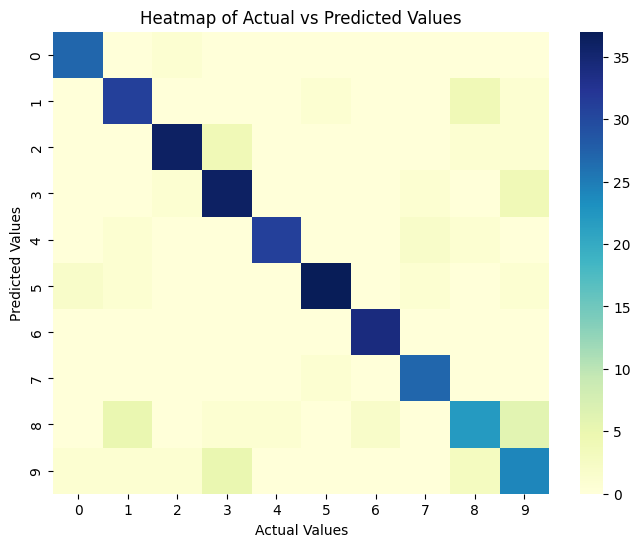

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
heatmap_data,x_edges,y_edges=np.histogram2d(y_test,np.argmax(A2,0))
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()